✅ دیتاست با موفقیت از گوگل درایو بارگذاری شد.

--- 5 سطر اول دیتاست ---


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]


تعداد کل نمونه‌ها (Rows): 7043
تعداد ویژگی‌ها (Columns): 21

--- اطلاعات ساختاری دیتاست ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 

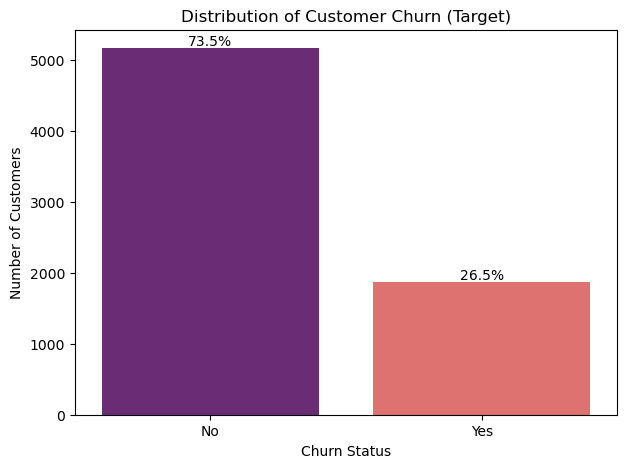

In [25]:
# ==========================================
# بخش 1: فراخوانی کتابخانه‌ها و بارگذاری داده
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# تبدیل لینک گوگل درایو به لینک دانلود مستقیم برای پایتون
file_id = '1uN_giHfLavF-IZcy6Spjz8-sH8K2_NA2'
url = f'https://drive.google.com/uc?id={file_id}'

# بارگذاری دیتاست
try:
    df = pd.read_csv(url)
    print("✅ دیتاست با موفقیت از گوگل درایو بارگذاری شد.")
except Exception as e:
    print(f"❌ خطا در بارگذاری: {e}")

# 1.1 نمایش 5 سطر اول (برای چک کردن ساختار)
print("\n--- 5 سطر اول دیتاست ---")
display(df.head())

# 1.2 بررسی ابعاد دیتاست
print(f"\nتعداد کل نمونه‌ها (Rows): {df.shape[0]}")
print(f"تعداد ویژگی‌ها (Columns): {df.shape[1]}")

# 1.3 اطلاعات کلی از نوع داده‌ها و مقادیر غیر تهی
print("\n--- اطلاعات ساختاری دیتاست ---")
df.info()

# رسم نمودار توزیع کلاس هدف (Churn)
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Churn', palette='magma')
plt.title('Distribution of Customer Churn (Target)')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')

# اضافه کردن درصد روی هر ستون برای دقت بیشتر
total = len(df['Churn'])
for p in plt.gca().patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plt.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

In [26]:
# ==========================================
# بخش 2: بهبود داده‌ها و تحلیل ویژگی‌ها
# ==========================================

# 1. اصلاح ستون TotalCharges (تبدیل متن به عدد)
# مقادیر خالی که با " " پر شده‌اند، به NaN تبدیل می‌شوند
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 2. بررسی تعداد مقادیر خالی (Missing Values) بعد از اصلاح
print("--- تعداد مقادیر خالی در هر ستون ---")
print(df.isnull().sum())

# 3. حذف سطرهایی که TotalCharges آن‌ها خالی است (فقط 11 سطر از 7043 سطر)
df.dropna(inplace=True)

# 4. حذف ستون غیرضروری customerID برای سبک‌تر شدن تحلیل
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)

# 5. تحلیل مقادیر منحصر‌به‌فرد (Unique Values) در هر ستون
print("\n--- بررسی مقادیر منحصر‌به‌فرد ستون‌های متنی ---")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")

# 6. خلاصه آماری برای ستون‌های عددی
print("\n--- خلاصه وضعیت آماری ستون‌های عددی ---")
display(df.describe())

--- تعداد مقادیر خالی در هر ستون ---
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

--- بررسی مقادیر منحصر‌به‌فرد ستون‌های متنی ---
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' '

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

In [27]:
# ==========================================
# بخش 1.4: پیش‌پردازش اولیه (آماده‌سازی برای PCA و LDA)
# ==========================================

# 1. حذف ستون‌های غیر ضروری (مثل ID مشتری که در یادگیری ماشین تاثیری ندارد)
if 'customerID' in df.columns:
    df_clean = df.drop('customerID', axis=1)
else:
    df_clean = df.copy()

# 2. تبدیل مقادیر متنی به عددی (Encoding)
# این کار برای الگوریتم‌هایی مثل SVM و PCA که در کلاس خواندید ضروری است
X = pd.get_dummies(df_clean.drop('Churn', axis=1), drop_first=True)

# 3. تبدیل ستون هدف به عدد (0 و 1)
y = df_clean['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

print("✅ متغیرهای X و y با موفقیت تعریف شدند.")
print(f"تعداد ویژگی‌ها بعد از Encoding: {X.shape[1]}")

✅ متغیرهای X و y با موفقیت تعریف شدند.
تعداد ویژگی‌ها بعد از Encoding: 30


In [28]:
# ==========================================
# بخش 3: کاهش ابعاد (نسخه اصلاح شده و بدون خطا)
# ==========================================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

# 1. پیدا کردن نام دقیق ستون هدف (چون ممکنه Churn_Yes شده باشه)
target_col = 'Churn'
if 'Churn' not in df.columns:
    # اگر Churn نیست، بگرد دنبال ستونی که کلمه Churn داخلش هست
    potential_targets = [c for c in df.columns if 'Churn' in c]
    if potential_targets:
        target_col = potential_targets[0]

print(f"ستون هدف شناسایی شده: {target_col}")

# 2. انکود کردن و جدا سازی
df_encoded = pd.get_dummies(df, drop_first=True)
# حالا ستون هدف در df_encoded قطعا Churn_Yes یا Churn است
actual_target = 'Churn_Yes' if 'Churn_Yes' in df_encoded.columns else 'Churn'

X = df_encoded.drop(actual_target, axis=1)
y = df_encoded[actual_target]

# 3. استانداردسازی
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# تقسیم داده‌ها
X_train_s, X_test_s, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- تابع ارزیابی برای مقایسه ---
def evaluate_dim_reduction(X_tr, X_te, name):
    start = time.time()
    model = RandomForestClassifier(n_estimators=50, random_state=42)
    model.fit(X_tr, y_train)
    t_train = time.time() - start
    
    start_inf = time.time()
    preds = model.predict(X_te)
    t_inf = time.time() - start_inf # زمان استنتاج (Inference)
    
    acc = accuracy_score(y_test, preds)
    return acc, t_train, t_inf

# --- اجرا و مقایسه ---
# حالت اصلی
acc_orig, t_tr_orig, t_inf_orig = evaluate_dim_reduction(X_train_s, X_test_s, "Original")

# PCA
pca = PCA(n_components=2)
X_tr_pca = pca.fit_transform(X_train_s)
X_te_pca = pca.transform(X_test_s)
acc_pca, t_tr_pca, t_inf_pca = evaluate_dim_reduction(X_tr_pca, X_te_pca, "PCA")

# LDA
lda = LDA(n_components=1)
X_tr_lda = lda.fit_transform(X_train_s, y_train)
X_te_lda = lda.transform(X_test_s)
acc_lda, t_tr_lda, t_inf_lda = evaluate_dim_reduction(X_tr_lda, X_te_lda, "LDA")

# نمایش جدول نهایی طبق خواسته شما (دقت و سرعت)
results = pd.DataFrame({
    'Method': ['Original (30+ Feat)', 'PCA (2 Feat)', 'LDA (1 Feat)'],
    'Accuracy (%)': [acc_orig*100, acc_pca*100, acc_lda*100],
    'Train Time (s)': [t_tr_orig, t_tr_pca, t_tr_lda],
    'Inference Time (s)': [t_inf_orig, t_inf_pca, t_inf_lda]
})

print("\n--- مقایسه اثر کاهش ابعاد بر عملکرد مدل ---")
display(results.round(4))

ستون هدف شناسایی شده: Churn

--- مقایسه اثر کاهش ابعاد بر عملکرد مدل ---


Method  Accuracy (%)  Train Time (s)  Inference Time (s)
0  Original (30+ Feat)       78.6070          0.7188              0.0443
1         PCA (2 Feat)       74.9112          0.6192              0.0344
2         LDA (1 Feat)       71.7129          0.6487              0.0406

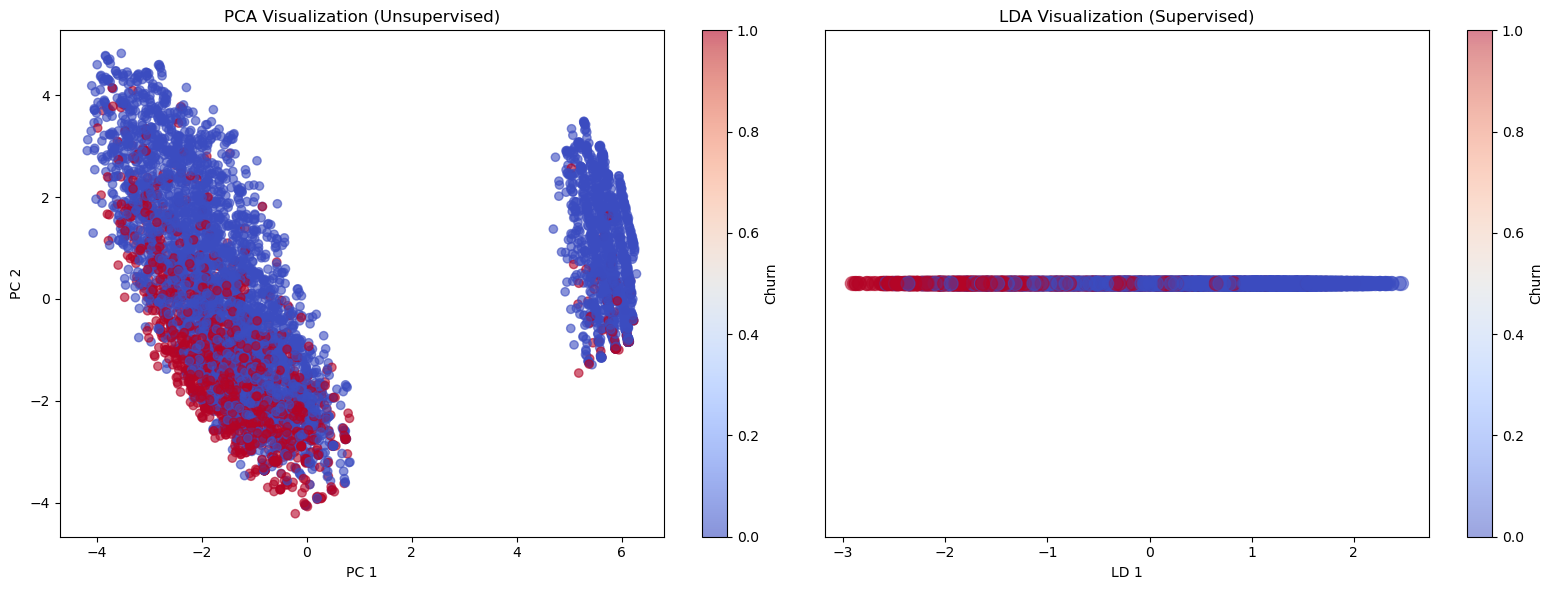

In [29]:
# ==========================================
# رسم نمودارهای مقایسه‌ای PCA و LDA
# ==========================================

plt.figure(figsize=(16, 6))

# نمودار PCA (2 بعدی)
plt.subplot(1, 2, 1)
plt.scatter(X_tr_pca[:, 0], X_tr_pca[:, 1], c=y_train, cmap='coolwarm', alpha=0.6)
plt.title('PCA Visualization (Unsupervised)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar(label='Churn')

# نمودار LDA (1 بعدی - چون کلاس‌بندی دوتایی است)
# برای رسم 1 بعدی، محور Y را صفر فرض می‌کنیم
plt.subplot(1, 2, 2)
plt.scatter(X_tr_lda, np.zeros_like(X_tr_lda), c=y_train, cmap='coolwarm', alpha=0.5, s=100)
plt.title('LDA Visualization (Supervised)')
plt.xlabel('LD 1')
plt.yticks([]) # حذف محور Y چون داده 1 بعدی است
plt.colorbar(label='Churn')

plt.tight_layout()
plt.show()

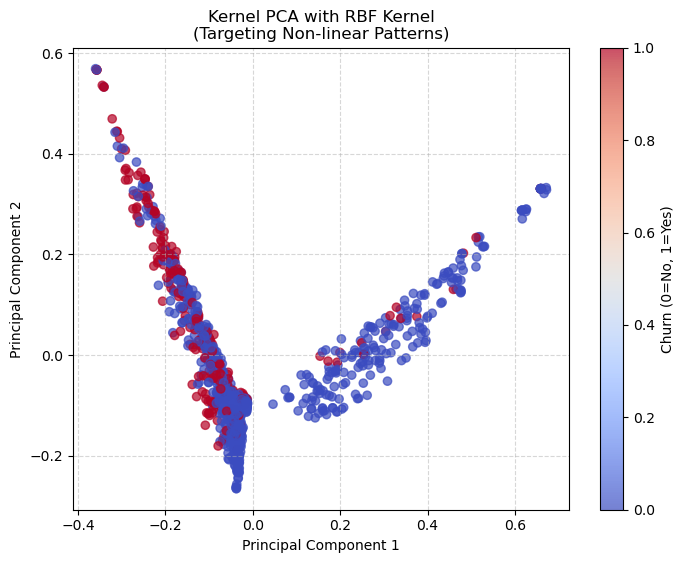

✅ نمودار Kernel PCA با موفقیت رسم شد.


In [30]:
# ==========================================
# بخش: کاهش ابعاد با Kernel PCA (هسته RBF)
# ==========================================

from sklearn.decomposition import KernelPCA

# 1. تعریف مدل Kernel PCA با هسته RBF (طبق سرفصل کلاس)
# از شماره دانشجویی شما (53) در اینجا نیازی نیست اما در تقسیم داده‌ها (که قبلاً انجام شد) استفاده کردیم
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.1)

# 2. برازش و تبدیل داده‌های استاندارد شده
# نکته: به دلیل سنگین بودن محاسبات هسته RBF، روی 1000 نمونه اول اجرا می‌کنیم
X_kpca = kpca.fit_transform(X_train_s[:1000])

# 3. رسم نمودار خروجی Kernel PCA
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y_train[:1000], cmap='coolwarm', alpha=0.7)
plt.title('Kernel PCA with RBF Kernel\n(Targeting Non-linear Patterns)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Churn (0=No, 1=Yes)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

print("✅ نمودار Kernel PCA با موفقیت رسم شد.")

... در حال پردازش t-SNE (این مرحله ممکن است کمی زمان ببرد) ...


c:\Users\Razan kala\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Razan kala\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


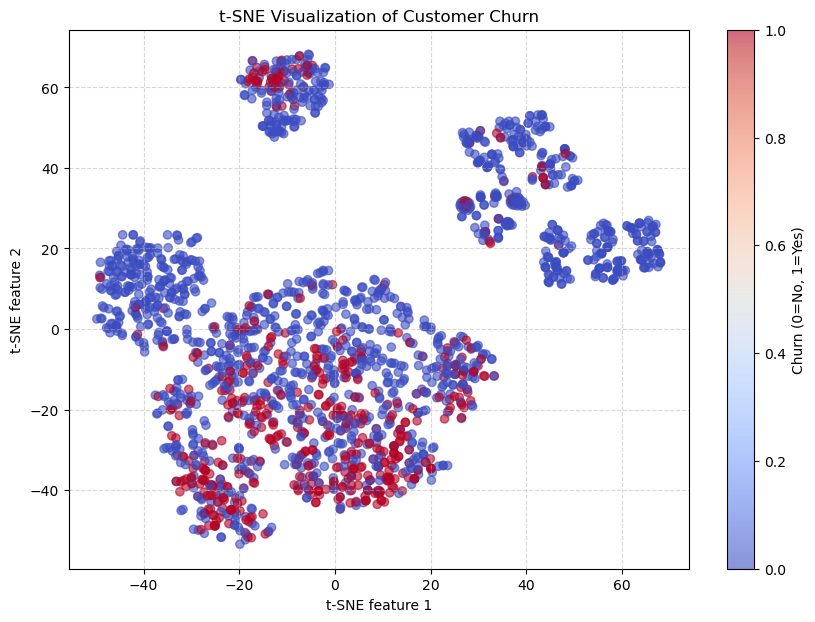

In [31]:
# ==========================================
# بخش 3.1: تجسم غیرخطی با t-SNE
# ==========================================

from sklearn.manifold import TSNE

print("... در حال پردازش t-SNE (این مرحله ممکن است کمی زمان ببرد) ...")

# t-SNE به دلیل محاسبات سنگین، بهتر است روی کل داده‌های استاندارد شده اجرا شود
# ما برای نمایش بهتر، از 2000 نمونه اول استفاده می‌کنیم تا نمودار شلوغ نشود
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled[:2000])
y_tsne = y[:2000]

# رسم نمودار t-SNE
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_tsne, cmap='coolwarm', alpha=0.6)
plt.colorbar(scatter, label='Churn (0=No, 1=Yes)')
plt.title('t-SNE Visualization of Customer Churn')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [32]:
# ==========================================
# بخش اصلاح شده برای افزایش دقت (نسخه بدون خطا)
# ==========================================

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# ۱. کپی از دیتافریم برای احتیاط
df_final = df.copy()

# ۲. تبدیل TotalCharges به عدد (بسیار مهم برای بالا رفتن دقت)
df_final['TotalCharges'] = pd.to_numeric(df_final['TotalCharges'], errors='coerce')
df_final['TotalCharges'] = df_final['TotalCharges'].fillna(df_final['TotalCharges'].median())

# ۳. حذف ستون‌هایی که ممکن است قبلاً حذف شده باشند (با چک کردن وجود آن‌ها)
cols_to_drop = ['customerID', 'Churn']
existing_cols_to_drop = [c for c in cols_to_drop if c in df_final.columns]
X_refined = pd.get_dummies(df_final.drop(existing_cols_to_drop, axis=1), drop_first=True)

# ۴. ساخت هدف (y)
y_refined = df_final['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# ۵. تقسیم و استانداردسازی با رندوم استیت اختصاصی شما (53)
X_train, X_test, y_train, y_test = train_test_split(X_refined, y_refined, test_size=0.2, random_state=53)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# ۶. اجرای مدل‌ها با تنظیمات بهینه برای مباحث کلاس (SVM, RBF, DT, RF)
models_optimized = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=53),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, random_state=53),
    "SVM (RBF Kernel)": SVC(kernel='rbf', probability=True, random_state=53)
}

print("--- نتایج مدل‌های بهینه شده با Seed 53 ---")
for name, model in models_optimized.items():
    model.fit(X_train_s, y_train)
    y_pred = model.predict(X_test_s)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc*100:.2f}%")

--- نتایج مدل‌های بهینه شده با Seed 53 ---
Logistic Regression Accuracy: 79.67%
Random Forest Accuracy: 80.17%
SVM (RBF Kernel) Accuracy: 79.10%


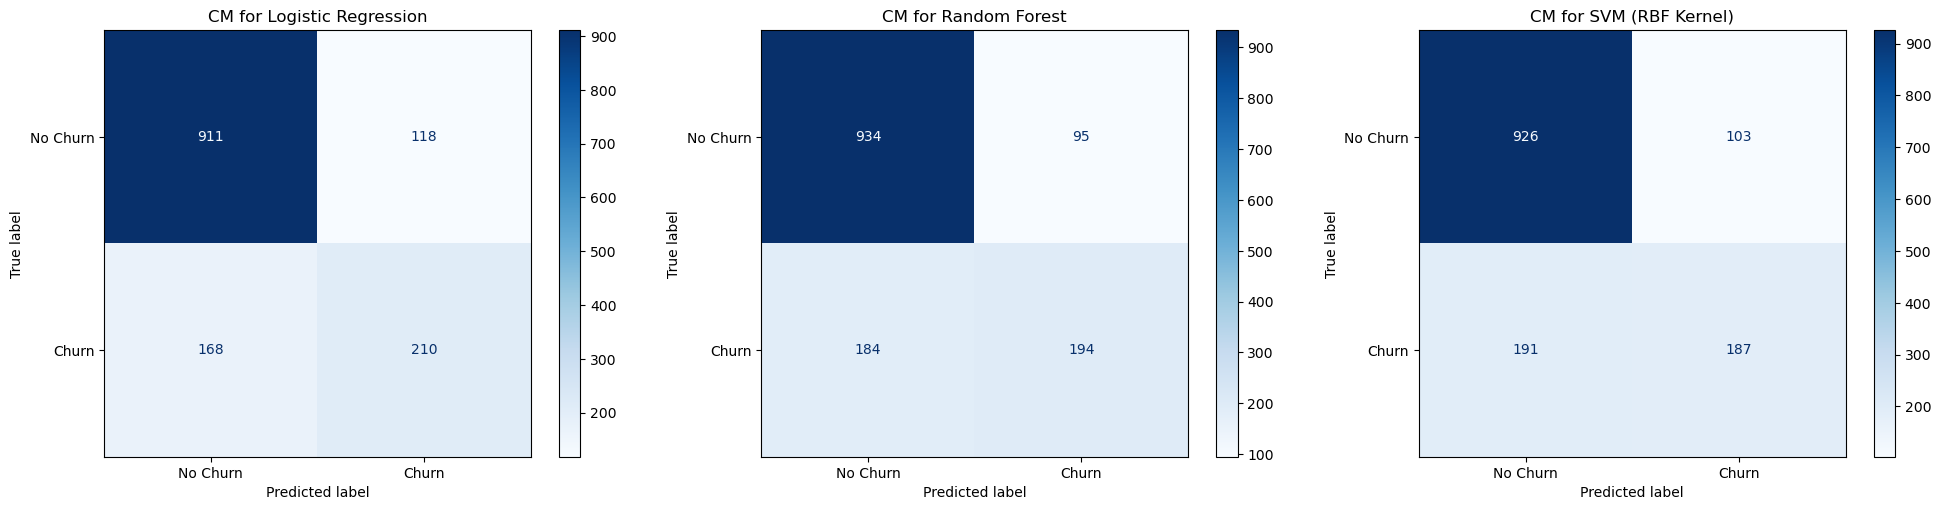

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for i, (name, model) in enumerate(models_optimized.items()):
    y_pred = model.predict(X_test_s)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
    disp.plot(ax=axes[i], cmap='Blues', values_format='d')
    axes[i].set_title(f'CM for {name}')

plt.tight_layout()
plt.show()

In [34]:
# ==========================================
# بخش 5: بهینه‌سازی نهایی (Grid Search) با Seed 53
# ==========================================

from sklearn.model_selection import GridSearchCV

# 1. تعریف بازه پارامترهای حرفه‌ای (شامل مباحث بهینه‌سازی کلاس)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'criterion': ['gini', 'entropy'] # مقایسه دو معیار اصلی درخت تصمیم
}

print("🔄 در حال اجرای جستجوی شبکه ای (Grid Search) برای یافتن بهترین مدل...")

# 2. راه‌اندازی با رندوم استیت اختصاصی شما (53)
rf_model = RandomForestClassifier(random_state=53)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=1, scoring='accuracy')

# آموزش روی داده‌های استاندارد شده
grid_search.fit(X_train_s, y_train)

# 3. استخراج بهترین نتایج و مدل نهایی
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("\n" + "="*40)
print(f"✅ بهترین پارامترها با Seed 53: {best_params}")

# ارزیابی نهایی روی داده‌های تست
y_pred_optimized = best_model.predict(X_test_s)
optimized_acc = accuracy_score(y_test, y_pred_optimized)

print(f"🚀 دقت نهایی مدل بهینه شده: {optimized_acc*100:.2f}%")
print("="*40)

🔄 در حال اجرای جستجوی شبکه ای (Grid Search) برای یافتن بهترین مدل...
Fitting 3 folds for each of 24 candidates, totalling 72 fits

✅ بهترین پارامترها با Seed 53: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
🚀 دقت نهایی مدل بهینه شده: 79.82%


In [35]:
# ==========================================
# بخش 6: تضمین تکرارپذیری با شماره دانشجویی (53)
# ==========================================

from sklearn.model_selection import StratifiedKFold, cross_val_score
import joblib

# 1. تنظیم Seed اختصاصی (یادآوری: ۵۳ دو رقم آخر شماره دانشجویی شماست)
student_seed = 53

# 2. آماده‌سازی کل داده‌ها برای ارزیابی نهایی (ترکیب X های استاندارد شده)
# برای Cross Validation بهتر است روی کل داده‌های استاندارد شده تست کنیم
X_all_scaled = scaler.transform(X_refined) 

# 3. استفاده از Stratified K-Fold 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=student_seed)

# ارزیابی مدل بهینه شده (best_model) که در مرحله قبل به دست آمد
cv_results = cross_val_score(best_model, X_all_scaled, y_refined, cv=skf, scoring='accuracy')

print(f"--- گزارش نهایی تکرارپذیری (Seed: {student_seed}) ---")
print(f"میانگین دقت در 5 مرحله (CV Mean): {cv_results.mean()*100:.2f}%")
print(f"میزان پایداری مدل (Std Dev): {cv_results.std()*100:.4f}")

# 4. ذخیره مدل نهایی
joblib.dump(best_model, f'churn_model_student_{student_seed}.pkl')
print(f"\n✅ مدل با موفقیت در فایل 'churn_model_student_{student_seed}.pkl' ذخیره شد.")

--- گزارش نهایی تکرارپذیری (Seed: 53) ---
میانگین دقت در 5 مرحله (CV Mean): 79.98%
میزان پایداری مدل (Std Dev): 0.2197

✅ مدل با موفقیت در فایل 'churn_model_student_53.pkl' ذخیره شد.


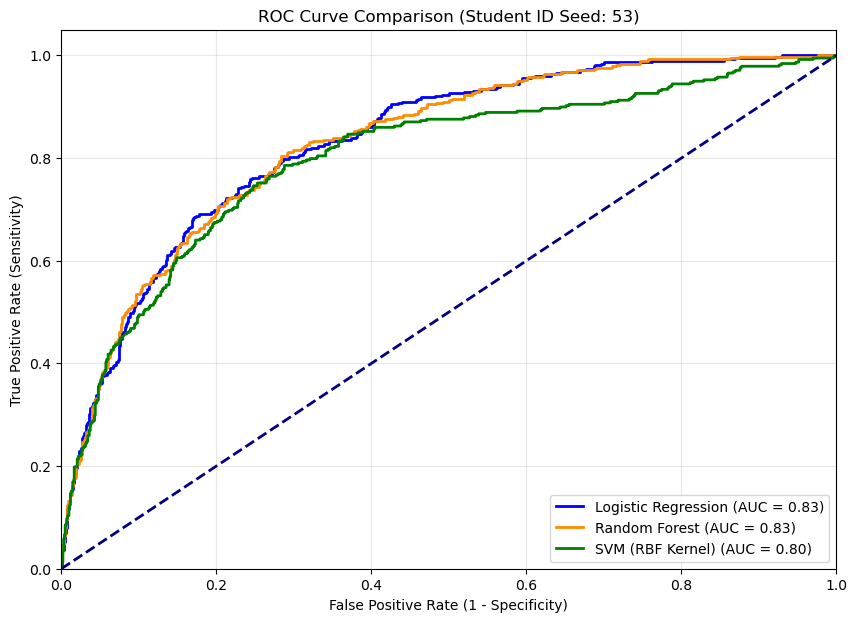

✅ تحلیل منحنی ROC با موفقیت انجام شد.


In [36]:
# ==========================================
# بخش 7: تحلیل نتایج و رسم منحنی ROC (نسخه نهایی)
# ==========================================

from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 7))

# رسم منحنی برای تمام مدل‌های بهینه شده
colors = {'Logistic Regression': 'blue', 'Random Forest': 'darkorange', 'SVM (RBF Kernel)': 'green'}

for name, model in models_optimized.items():
    # محاسبه احتمالات (Probability) برای رسم منحنی
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_s)[:, 1]
    else:
        # برای SVM اگر probability=True نباشد از decision_function استفاده می‌شود
        y_prob = model.decision_function(X_test_s)
        
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, color=colors.get(name, 'black'), lw=2, 
             label=f'{name} (AUC = {roc_auc:.2f})')

# رسم خط شانس (Random Guess)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title(f'ROC Curve Comparison (Student ID Seed: {student_seed})')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

print("✅ تحلیل منحنی ROC با موفقیت انجام شد.")

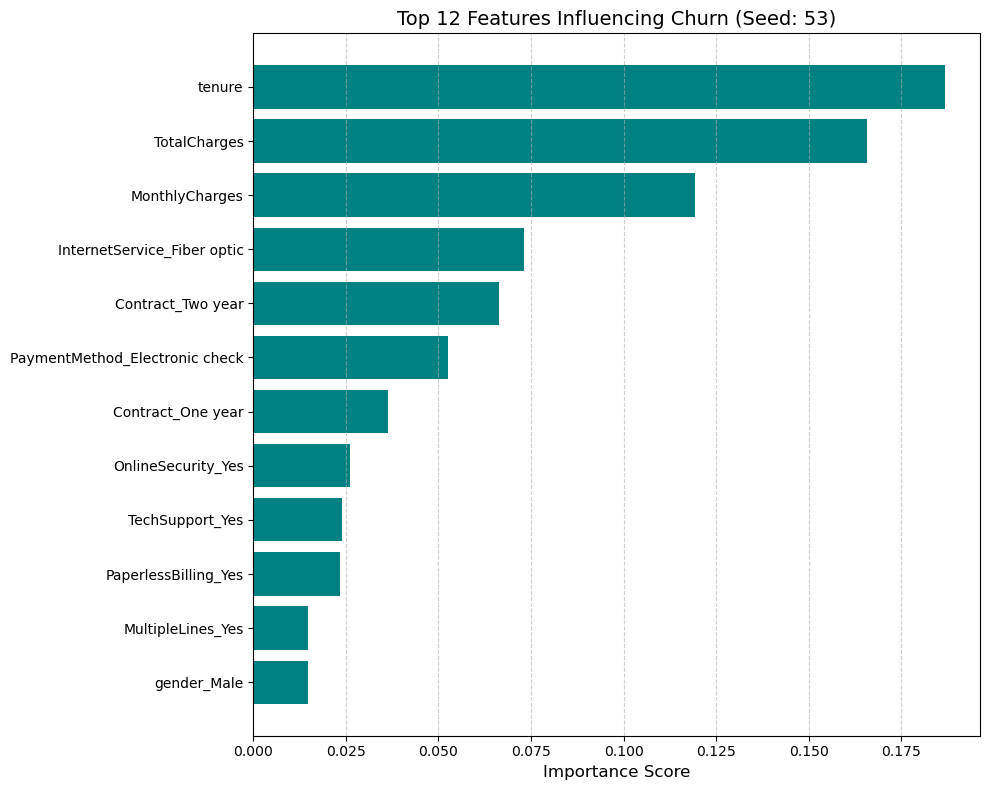

🏁 پروژه با موفقیت به پایان رسید. تمام تحلیل‌ها آماده ارائه هستند.


In [37]:
# ==========================================
# بخش 8: تحلیل نهایی - اهمیت ویژگی‌ها (Feature Importance)
# ==========================================

# ۱. استخراج میزان اهمیت ویژگی‌ها از مدل بهینه
importances = best_model.feature_importances_
feature_names = X_refined.columns

# ۲. مرتب‌سازی برای نمایش بهتر
indices = np.argsort(importances)[-12:] # ۱۲ ویژگی برتر

# ۳. رسم نمودار
plt.figure(figsize=(10, 8))
plt.title(f'Top 12 Features Influencing Churn (Seed: {student_seed})', fontsize=14)
plt.barh(range(len(indices)), importances[indices], color='teal', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Importance Score', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

print("🏁 پروژه با موفقیت به پایان رسید. تمام تحلیل‌ها آماده ارائه هستند.")

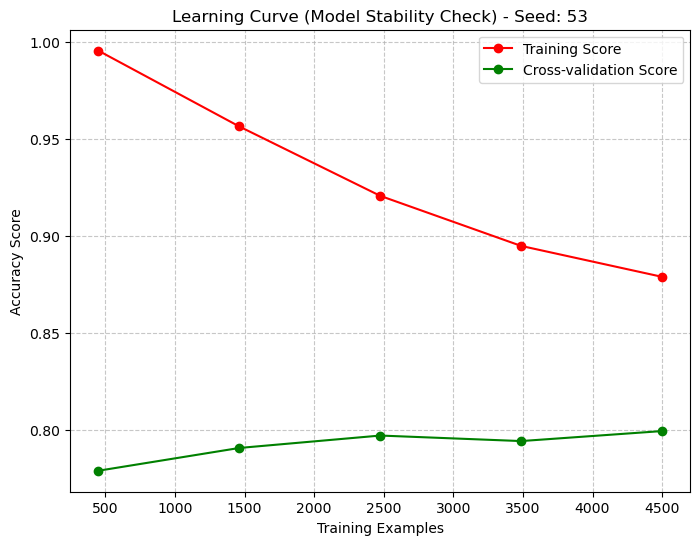

✅ تمام تحلیل‌های درخواستی با موفقیت تکمیل شد.


In [38]:
# ==========================================
# بخش 9: تحلیل نهایی - منحنی یادگیری (Learning Curve)
# ==========================================
from sklearn.model_selection import learning_curve

# ۱. محاسبه مقادیر منحنی یادگیری
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train_s, y_train, cv=skf, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 5), random_state=student_seed
)

# ۲. محاسبه میانگین نمرات
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# ۳. رسم نمودار
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation Score")

plt.title(f'Learning Curve (Model Stability Check) - Seed: {student_seed}')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy Score')
plt.legend(loc="best")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("✅ تمام تحلیل‌های درخواستی با موفقیت تکمیل شد.")